# Task 3 - Unsupervised Learning 

#### The Spark Foundation  - Mohit Agrawal

### From the given 'IRIS' dataset, predict the optimum number of cluster and represent it visually.

## Import Libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.cluster import KMeans

%matplotlib inline

## Load and Read Dataset

In [2]:
url = 'https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Split the DataSet

In [3]:
X = df.iloc[:, [1,2,3,4]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### K-Mean Clustering

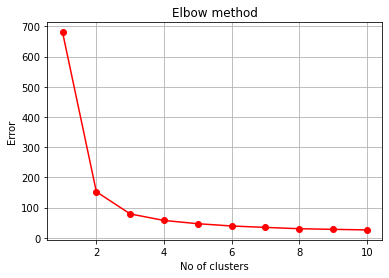

In [4]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error, marker='o', color='r')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [5]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
print(kmeans.labels_)

[1 4 4 4 1 8 4 1 4 4 8 1 4 4 8 8 8 1 8 8 1 1 4 1 1 4 1 1 1 4 4 1 8 8 4 4 8
 4 4 1 1 4 4 1 8 4 8 4 8 1 7 7 7 3 7 5 7 9 7 3 9 5 3 5 3 7 5 3 5 3 0 5 0 5
 7 7 7 7 5 3 3 3 3 0 5 5 7 5 3 3 3 5 3 9 3 5 5 5 9 3 2 0 6 2 2 6 3 6 2 6 2
 0 2 0 0 2 2 6 6 0 2 0 6 0 2 6 0 0 2 6 6 6 2 0 0 6 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
print(kmeans.cluster_centers_)

[[6.02777778 2.73333333 5.02777778 1.79444444]
 [5.07647059 3.44705882 1.52352941 0.28823529]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.57647059 2.59411765 3.98235294 1.21764706]
 [4.69       3.085      1.385      0.19      ]
 [5.94       2.86       4.42       1.38666667]
 [7.475      3.125      6.3        2.05      ]
 [6.63333333 3.03333333 4.63333333 1.45833333]
 [5.4        3.89230769 1.50769231 0.26923077]
 [5.         2.3        3.275      1.025     ]]


In [8]:
len(df['SepalLengthCm'].unique())

35

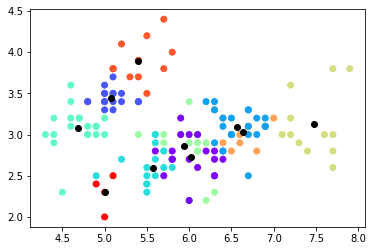

In [9]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_ , cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [10]:
kmeans.cluster_centers_[:,1]

array([2.73333333, 3.44705882, 3.08636364, 2.59411765, 3.085     ,
       2.86      , 3.125     , 3.03333333, 3.89230769, 2.3       ])

In [11]:
y_kmeans = kmeans.fit_predict(X)

In [12]:
y_kmeans

array([6, 9, 9, 9, 6, 1, 9, 6, 9, 9, 1, 6, 9, 9, 1, 1, 1, 6, 1, 6, 6, 6,
       9, 6, 6, 9, 6, 6, 6, 9, 9, 6, 1, 1, 9, 9, 1, 9, 9, 6, 6, 9, 9, 6,
       6, 9, 6, 9, 1, 6, 0, 0, 0, 4, 0, 4, 0, 3, 0, 4, 3, 4, 4, 0, 4, 0,
       4, 4, 7, 4, 7, 4, 7, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 7, 4, 0, 0, 0,
       4, 4, 4, 0, 4, 3, 4, 4, 4, 0, 3, 4, 5, 7, 8, 5, 5, 8, 4, 8, 5, 2,
       5, 7, 5, 7, 7, 5, 5, 2, 8, 7, 5, 7, 8, 7, 5, 8, 7, 7, 5, 8, 8, 2,
       5, 7, 7, 8, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 7])

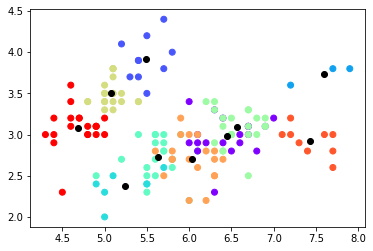

In [13]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_ , cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [14]:
X[y_kmeans == 0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
54,6.5,2.8,4.6,1.5
56,6.3,3.3,4.7,1.6
58,6.6,2.9,4.6,1.3
63,6.1,2.9,4.7,1.4
65,6.7,3.1,4.4,1.4
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3


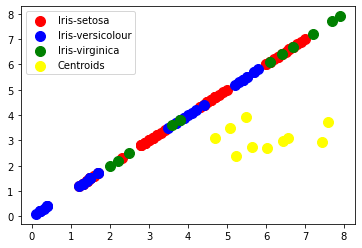

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()